In [1]:
##############################
# Author: Jacob van de Lindt
# Date:   May 22, 2023
# MIT PSFC
##############################

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker, cm 
import os, sys
import netCDF4

In [2]:
# Setting up the paths to the local directory
# abspath = os.path.abspath('')
# dname = os.path.dirname(abspath)
# print(abspath)
# os.chdir(dname)
wkdir = os.getcwdb()

In [4]:
# Loading up the netcdf4 datasets
remoteDirectory = open(f'../../../../remoteDirectory.txt', 'r').readlines()[0].strip()
print('You are using remoteDirectory = ', remoteDirectory)
shotNum = remoteDirectory.split('/')[-1].split('_')[1]

scan_var_array = np.array([0.7])  #  the values of the scan
scan_var_type = 'RF Power [MW]' # type of scan 

# # 0.5 MW 
# cql_nc_0_5 = netCDF4.Dataset(f'cql3d_rfpwr_0_5.nc','r')
# cqlrf_nc_0_5 = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_5.nc','r')

# # 0.55 MW 
# cql_nc_0_55 = netCDF4.Dataset(f'cql3d_rfpwr_0_55.nc','r')
# cqlrf_nc_0_55 = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_55.nc','r')

# # 0.6 MW 
# cql_nc_0_6 = netCDF4.Dataset(f'cql3d_rfpwr_0_6.nc','r')
# cqlrf_nc_0_6 = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_6.nc','r')

# # 0.65 MW 
# cql_nc_0_65 = netCDF4.Dataset(f'cql3d_rfpwr_0_65.nc','r')
# cqlrf_nc_0_65 = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_65.nc','r')

# 0.7 MW 
cql_nc_0_7 = netCDF4.Dataset(f'cql3d_rfpwr_0_7.nc','r')
cqlrf_nc_0_7 = netCDF4.Dataset(f'cql3d_krf_rfpwr_0_7.nc','r')

# load up the cql arrays
cql_nc_array = [cql_nc_0_7]
cqlrf_nc_array = [cqlrf_nc_0_7]

You are using remoteDirectory =  ~/HFW_147634


In [6]:
# Get particle properties, for now assume they all have same mesh points 
# rya0 = cql_nc_0_55.variables["rya"][:]
# rya2_5 = cql_nc_0_5.variables["rya"][:]
# rya5 = cql_nc_0_6.variables["rya"][:]
# rya7_5 = cql_nc_0_65.variables["rya"][:]
rya10 = cql_nc_0_7.variables["rya"][:]
# print(np.array_equal(rya0, rya2_5))
# print(np.array_equal(rya0, rya5))
# print(np.array_equal(rya0, rya7_5))
# print(np.array_equal(rya0, rya10))

# they are the same. Set a variable that is not dependent on beam energy. 
rya = rya10

#pitch angles mesh at which f is defined in radians.
#Note that np.ma.getdata pulls data through mask which
# rejects bad data (NAN, etc)
# pitchAngleMesh0 = np.ma.getdata(cql_nc_0_55.variables["y"][:])   # y is pitch angle, x is velocity (momentum per mass)
# pitchAngleMesh2_5 = np.ma.getdata(cql_nc_0_5.variables["y"][:])
# pitchAngleMesh5 = np.ma.getdata(cql_nc_0_6.variables["y"][:])
# pitchAngleMesh7_5 = np.ma.getdata(cql_nc_0_65.variables["y"][:])
pitchAngleMesh10 = np.ma.getdata(cql_nc_0_7.variables["y"][:])

# print(np.array_equal(pitchAngleMesh0, pitchAngleMesh2_5))
# print(np.array_equal(pitchAngleMesh0, pitchAngleMesh5))
# print(np.array_equal(pitchAngleMesh0, pitchAngleMesh7_5))
# print(np.array_equal(pitchAngleMesh0, pitchAngleMesh10))

# all are equal. set just one pitch angle mesh 
pitchAngleMesh = pitchAngleMesh10


#normalized speed mesh of f
# normalizedVel0 = cql_nc_0_55.variables["x"][:]
# normalizedVel2_5 = cql_nc_0_5.variables["x"][:]
# normalizedVel5 = cql_nc_0_6.variables["x"][:]
# normalizedVel7_5 = cql_nc_0_65.variables["x"][:]
normalizedVel10 = cql_nc_0_7.variables["x"][:]

# print(np.array_equal(normalizedVel0 , normalizedVel2_5))
# print(np.array_equal(normalizedVel0 , normalizedVel5))
# print(np.array_equal(normalizedVel0 , normalizedVel7_5))
# print(np.array_equal(normalizedVel0 , normalizedVel10))

# independent of beam energy. Set one value 
normalizedVel = normalizedVel10


#print(normalizedVel.shape)

#energy  = restmkev*(gamma-1)
#energies corresponding to velocities jx
# enerkev0 = cql_nc_0_55.variables["enerkev"][:] 
# enerkev2_5 = cql_nc_0_5.variables["enerkev"][:] 
# enerkev5 = cql_nc_0_6.variables["enerkev"][:] 
# enerkev7_5 = cql_nc_0_65.variables["enerkev"][:] 
enerkev10 = cql_nc_0_7.variables["enerkev"][:] 

# print(np.array_equal(enerkev0, enerkev2_5))
# print(np.array_equal(enerkev0, enerkev5))
# print(np.array_equal(enerkev0, enerkev7_5))
# print(np.array_equal(enerkev0, enerkev10))

# these are also all the same. 

enerkev = enerkev10


#flux surface average energy per particle in keV 
print('--')
# energy0 = cql_nc_0_55.variables["energy"][:] #(tdim, r0dim, species_dim)
# energy2_5 = cql_nc_0_5.variables["energy"][:] #(tdim, r0dim, species_dim)
# energy5 = cql_nc_0_6.variables["energy"][:] #(tdim, r0dim, species_dim)
# energy7_5 = cql_nc_0_65.variables["energy"][:] #(tdim, r0dim, species_dim)
energy10 = cql_nc_0_7.variables["energy"][:] #(tdim, r0dim, species_dim)

# print(np.array_equal(energy0, energy2_5))
# print(np.array_equal(energy0, energy5))
# print(np.array_equal(energy0, energy7_5))
# print(np.array_equal(energy0, energy10))

# so for example, energy[0, 0] gets an array at time zero and r[0] that is filled with 
# one energy for a species i. Note that we can have both maxwellian
# and general for each species
print(enerkev.shape)
print(energy10.shape)
print(energy10[0, 0])
print(energy10[100, 0])

print('CHECK THAT THESE MESHES ARE GOOD TO USE')
print('CHECKED. All meshes are identical, but the energy array differs')

--
(500,)
(201, 65, 5)
[8.87702588 6.72593275 8.88367488 8.88367488 6.66275616]
[11.1666112   6.73249573  8.88367488  8.88367488  6.66275616]
CHECK THAT THESE MESHES ARE GOOD TO USE
CHECKED. All meshes are identical, but the energy array differs


In [7]:
print(pitchAngleMesh[0]/np.pi)

[0.         0.0042735  0.00854701 0.01282051 0.01709402 0.02136752
 0.02564103 0.02991453 0.03418803 0.03846154 0.04273504 0.04700855
 0.05128205 0.05555556 0.05982906 0.06410256 0.06837607 0.07264957
 0.07692308 0.08119658 0.08547009 0.08974359 0.09401709 0.0982906
 0.1025641  0.10683761 0.11111111 0.11538462 0.11965812 0.12393162
 0.12820513 0.13247863 0.13675214 0.14102564 0.14529915 0.14957265
 0.15384615 0.15811966 0.16239316 0.16666667 0.17094017 0.17521368
 0.17948718 0.18376068 0.18803419 0.19230769 0.1965812  0.2008547
 0.20512821 0.20940171 0.21367521 0.21794872 0.22222222 0.22649573
 0.23076923 0.23504274 0.23931624 0.24358974 0.24786325 0.25213675
 0.25641026 0.26068376 0.26495726 0.26923077 0.27350427 0.27777778
 0.28205128 0.28632479 0.29059829 0.29487179 0.2991453  0.3034188
 0.30769231 0.31196581 0.31623932 0.32051282 0.32478632 0.32905983
 0.33333333 0.33760684 0.34188034 0.34615385 0.35042735 0.35470085
 0.35897436 0.36324786 0.36752137 0.37179487 0.37606838 0.3803418

(2, 65, 500, 240)
(500,)


<ipython-input-10-c456bf3298f8>:41: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = ax.pcolormesh(VPARA, VPERP, np.log(f_at_rho.T + 1))#np.log(f_at_rho.T+1))


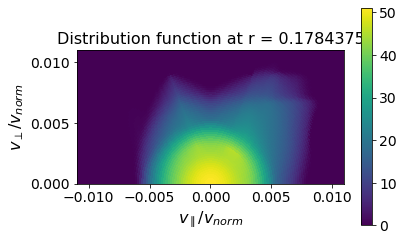

11
(240, 500)


In [10]:
# distrobution function 
#distribution function (lrz, jx, iy)
#vnorm^3*s^3/cm^6

f_array = np.zeros_like(scan_var_array).tolist()
for i in range(scan_var_array.shape[0]):
    f_array[i] = cql_nc_array[i].variables["f"][:]

# f0_55 = cql_nc_0_55.variables["f"][:]
# f0_5 = cql_nc_0_5.variables["f"][:]
# f0_6 = cql_nc_0_6.variables["f"][:]
# f0_65 = cql_nc_0_65.variables["f"][:]
# f0_7 = cql_nc_0_7.variables["f"][:]
#print(np.where(scan_var_array == 0.65))
f = f_array[0] #np.where(scan_var_array == 0.65)[0][0]]
cql_nc = cql_nc_0_7
ebkev = 80 # kev TODO: make sure this matches the file!! 

print(f.shape)
print(enerkev.shape)

## Plot the distrobution function at a particular rho
rho = 0.1829 #0.25
i_rho = np.argmin(np.abs(rho - rya))

f_at_rho = f[0, i_rho, :, :]#f[0, i_rho, :, :]

pitchAngles = pitchAngleMesh[i_rho,:]
x = cql_nc.variables["x"][:]

V, Theta = np.meshgrid(x, pitchAngles)
VPARA = V*np.cos(Theta); VPERP = V*np.sin(Theta)

plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('axes', labelsize = 16)
plt.rc('axes', titlesize = 16)
plt.rc('figure', titlesize = 18)
plt.rc('legend', fontsize = 14)
fig,ax = plt.subplots()
pc = ax.pcolormesh(VPARA, VPERP, np.log(f_at_rho.T + 1))#np.log(f_at_rho.T+1))
#ax.contourf(VPARA, VPERP, np.log(relevantF.T), cmap=cm.PuBu_r, levels = 100)
ax.set_aspect('equal')
ax.set_xlabel("$v_\parallel / v_{norm}$")
ax.set_ylabel("$v_\perp / v_{norm}$")
ax.set_ylim([0,0.011]); ax.set_xlim([-0.011,0.011])
ax.set_title(f'Distribution function at r = {rya[i_rho]}')
fig.colorbar(pc)
plt.show()
print(i_rho)
print(VPARA.shape)

In [11]:
# Build the plot of energetic particles for a particular distrobution 

minEnergy = 2 # minimum energy for plotting

#index of that minimum energy in enerkev
#this index is also the index for the corresponding velocity
minEnergyIndex = np.where(enerkev < minEnergy)[0][-1]
#distribution function for energetic particles
energeticF = f[0, :,minEnergyIndex:,:]#f[0, :,minEnergyIndex:,:]

# begin integrating over velocity space 
energeticF_integOverPitch = np.zeros((len(rya), len(enerkev[minEnergyIndex:])))

# loop over r/a. At each r/a, integrate over all pitch angle. 
for rhoIndex in range(len(rya)):
    #this is the angular part of the spherical jacobian
    integOverPitch = 2*np.pi*np.trapz(energeticF[rhoIndex,:]*np.sin(pitchAngleMesh[rhoIndex]), pitchAngleMesh[rhoIndex], axis = 1)
    energeticF_integOverPitch[rhoIndex,:] = integOverPitch
    
print('REMEBER: check you selected the correct f from above cell')

REMEBER: check you selected the correct f from above cell


In [12]:
relevantEnergies = enerkev[minEnergyIndex:]
relevantVels = normalizedVel[minEnergyIndex:]
energeticDensity = np.zeros((len(rya), len(relevantEnergies)-1))
#the energies at which the values of energeticDensity are centered
energyCenters = (relevantEnergies[1:] + relevantEnergies[:-1])/2
#We calculate energy centers by integrating up to the velocity mesh point on either side of the corresponding energyCenter point
#we then take the differences, which is the area in the bin between these two edges
for velIndex in range(len(relevantVels)-1):
    #this is the radial part of the spherical jacobian
    densityLower = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,:velIndex]*relevantVels[:velIndex]**2,
        relevantVels[:velIndex]))
    densityUpper = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,:velIndex+1]*relevantVels[:velIndex+1]**2,
        relevantVels[:velIndex+1]))

    if velIndex == 0:
        energeticDensity[:,velIndex] = densityUpper
        continue

    diff = densityUpper - densityLower

    energeticDensity[:,velIndex] = diff
    
energeticDensity = energeticDensity*1e6#convert to m^(-3)
energeticDensity = energeticDensity.astype('float64')
rya = rya.astype('float64')



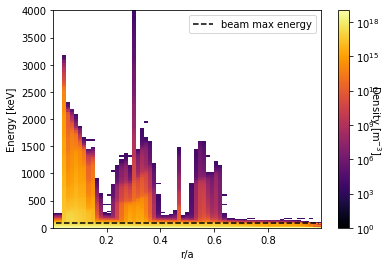

In [13]:
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', labelsize = 10)
plt.rc('axes', titlesize = 10)
plt.rc('figure', titlesize = 10)
plt.rc('legend', fontsize = 10)
#"""
fig, ax = plt.subplots()
# pcm = ax.pcolormesh(energyCenters, rya, energeticDensity, 
#                 norm=colors.LogNorm(vmin=1, vmax=np.max(energeticDensity)),
#                 shading = 'nearest')
# print('---')
# print(rya.shape)
pcm = ax.pcolormesh(rya.T, energyCenters.T, energeticDensity.T, 
                norm=colors.LogNorm(vmin=1, vmax=np.max(energeticDensity.T)),
                shading = 'nearest', cmap='inferno')

cbar = fig.colorbar(pcm, ax=ax)#, extend='max')
cbar.set_label(r'Density [m$^{-3}$]', rotation=270)
ax.set_ylim([0,4000])
plt.savefig('heatmap.png')
plt.plot(rya, (rya/rya)*ebkev, 'k--', label='beam max energy')
plt.xlabel('r/a')
plt.ylabel('Energy [keV]')
plt.legend()
plt.show()

In [14]:
cynt2 = np.ma.getdata(cql_nc_array[0].variables['cynt2'])
np.trapz(cynt2[0,:])
print(np.where(abs(rya-0.1) == np.min(abs(rya-0.1))))


(array([6]),)


(500,)
(65, 240)
(65, 500, 240)
(500,)
5.928619235902101e+19
['6e19', '6e19', '6e19', '5.986725056634288e19', '5.986725056634288e19', '5.986725056634288e19', '5.948518485302237e19', '5.948518485302237e19', '5.948518485302237e19', '5.887259120967139e19', '5.887259120967139e19', '5.887259120967139e19', '5.80455313706103e19', '5.80455313706103e19', '5.80455313706103e19', '5.702018824288829e19', '5.702018824288829e19', '5.702018824288829e19', '5.581357329271045e19', '5.581357329271045e19', '5.581357329271045e19', '5.444483787761028e19', '5.444483787761028e19', '5.444483787761028e19', '5.2945027091694944e19', '5.2945027091694944e19', '5.2945027091694944e19', '5.13546261090572e19', '5.13546261090572e19', '5.13546261090572e19', '4.972371000723766e19', '4.972371000723766e19', '4.972371000723766e19', '4.810849763151402e19', '4.810849763151402e19', '4.810849763151402e19', '4.6564296560072016e19', '4.6564296560072016e19', '4.6564296560072016e19', '4.514401272324039e19', '4.514401272324039e19', '4

(0.0, 50000000000000.0)

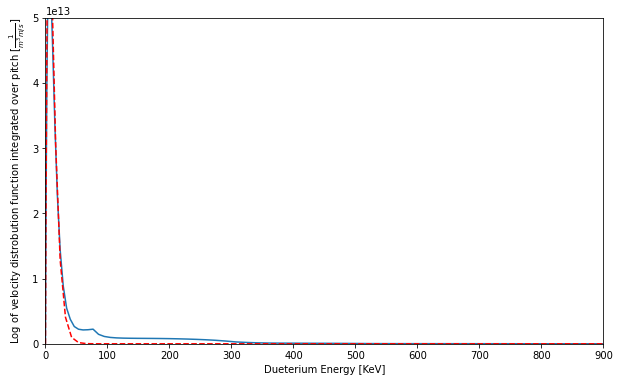

In [84]:
# new area to test out Yuri's fix.
M = 3.343e-27
vnorm = np.ma.getdata(cql_nc_array[0].variables['vnorm'])
cint2 = cql_nc_array[0].variables['cint2']
x_squared_dx = np.ma.getdata(cint2)
cynt2 = cql_nc_array[0].variables['cynt2']
normalizedVel = np.ma.getdata(cql_nc_array[0].variables['x'][:])
two_pi_siny_dy = np.ma.getdata(cynt2)  # note that the pitch angle mesh depends on the radial location 

print(x_squared_dx.shape)
print(two_pi_siny_dy.shape) 

rhoindex = 4

ff = f_array[0][0]
print(ff.shape)

integrated_over_pitch = np.trapz(ff[rhoindex, :]*two_pi_siny_dy[rhoindex], axis=1)
density = np.trapz(integrated_over_pitch*x_squared_dx)

#---------------
density_at_energy = np.zeros(normalizedVel.shape[0])
energyCenters = (enerkev[1:] + enerkev[:-1])/2
for velIndex in range(len(normalizedVel)-1):
    #this is the radial part of the spherical jacobian
    densityLower = np.ma.getdata(np.trapz(integrated_over_pitch[:velIndex]*x_squared_dx[:velIndex]))
    densityUpper = np.ma.getdata(np.trapz(integrated_over_pitch[:velIndex+1]*x_squared_dx[:velIndex+1]))

    if velIndex == 0:
        density_at_energy[velIndex] = densityUpper
        continue

    diff = densityUpper - densityLower

    density_at_energy[velIndex] = diff

#---------------
velocity_array = normalizedVel*vnorm/100 # this is in SI
vslice = 120
print(integrated_over_pitch.shape)
print(density*1e6)
#plt.plot(normalizedVel[:100]*vnorm/100, 1e6*density_at_energy[:100]/fac)
plt.figure(figsize=(10,6))
#plt.plot(velocity_array[:vslice], 1e6*integrated_over_pitch[:vslice]*normalizedVel[:vslice]**2*(1/vnorm)*100)
plt.plot(enerkev[:vslice], (1e6*integrated_over_pitch[:vslice]*normalizedVel[:vslice]**2*(1/vnorm)*100+1))
max_energy_grid, max_fvsquared = plot_maxwell(rhoindex, plotlog=False)
plt.xlabel('Dueterium Velocity [m/s]')
plt.xlabel('Dueterium Energy [KeV]')
plt.ylabel(r'Log of velocity distrobution function integrated over pitch [$\frac{1}{m^3 m/s}$]')

print('Fast particle Density: ', 1e6*np.trapz(density_at_energy))#*fac, normalizedVel*vnorm/100))
print(np.sum(density_at_energy*1e6))
print(np.sqrt(2*125000*1.6022e-19/M))
plt.xlim(0, 900)
plt.ylim(0, (0.5e14))

Text(0, 0.5, 'Density [$m^{-3}$]')

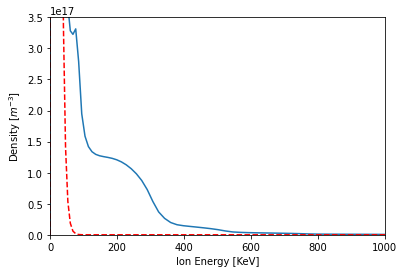

In [70]:
plt.plot(enerkev[:vslice], 1e6*density_at_energy[:vslice])
# get maxwell version of this plot
#---------------
max_density_at_energy = np.zeros(normalizedVel[:vslice].shape[0])
from scipy.interpolate import interp1d
get_max_fvsq = interp1d(max_energy_grid, max_fvsquared, kind='cubic')
max_fvsq = get_max_fvsq(np.ma.getdata(enerkev[:vslice]))
for velIndex in range(len(normalizedVel[:vslice])-1):
    #this is the radial part of the spherical jacobian
    mdensityLower = np.ma.getdata(np.trapz(max_fvsq[:velIndex], normalizedVel[:velIndex]*vnorm/100))
    mdensityUpper = np.ma.getdata(np.trapz(max_fvsq[:velIndex+1], normalizedVel[:velIndex+1]*vnorm/100))

    if velIndex == 0:
        max_density_at_energy[velIndex] = densityUpper
        continue

    diff = mdensityUpper - mdensityLower

    max_density_at_energy[velIndex] = diff

plt.plot(enerkev[:vslice], max_density_at_energy, 'r--')
plt.xlim(0, 1000)
plt.ylim(0, 3.5e17)
plt.xlabel('Ion Energy [KeV]')
plt.ylabel(r'Density [$m^{-3}$]')

In [28]:
#print(normalizedVel*vnorm/100)
print(normalizedVel[:40]**2*(normalizedVel[1:41] - normalizedVel[:40]))
print('-----')
print(x_squared_dx[:40])

[0.00000000e+00 5.89767737e-12 2.35907095e-11 5.30790963e-11
 9.43628379e-11 1.47441934e-10 2.12316385e-10 2.88986191e-10
 3.77451352e-10 4.77711867e-10 5.89767737e-10 7.13618962e-10
 8.49265541e-10 9.96707475e-10 1.15594476e-09 1.32697741e-09
 1.50980541e-09 1.70442876e-09 1.91084747e-09 2.12906153e-09
 2.35907095e-09 2.60087572e-09 2.85447585e-09 3.11987133e-09
 3.39706216e-09 3.68604836e-09 3.98682990e-09 4.29940680e-09
 4.62377906e-09 4.95994667e-09 5.30790963e-09 5.66766795e-09
 6.03922163e-09 6.42257065e-09 6.81771504e-09 7.22465478e-09
 7.64338987e-09 8.07392032e-09 8.51624612e-09 8.97036728e-09]
-----
[2.45736557e-13 5.89767737e-12 2.35907095e-11 5.30790963e-11
 9.43628379e-11 1.47441934e-10 2.12316385e-10 2.88986191e-10
 3.77451352e-10 4.77711867e-10 5.89767737e-10 7.13618962e-10
 8.49265541e-10 9.96707475e-10 1.15594476e-09 1.32697741e-09
 1.50980541e-09 1.70442876e-09 1.91084747e-09 2.12906153e-09
 2.35907095e-09 2.60087572e-09 2.85447585e-09 3.11987133e-09
 3.39706216e-09 3

In [19]:
# New area for generating T_fast(rho) and n_fast(rho)
vnorm = np.ma.getdata(cql_nc_array[0].variables['vnorm'])

def get_fast_temp_and_density(f, minEnergy, rya, enerkev, pitchAngleMesh, vnorm):
    """
    This function takes in a cql3d distrobution function, minumum relevant energy, radial mesh, energy mesh, and pitch angle mesh
    and returns T_fast(rya), n_fast(rya), the temperature and densities of the fast particle distrobution function. 
    """

    #index of that minimum energy in enerkev
    #this index is also the index for the corresponding velocity
    minEnergyIndex = np.where(enerkev < minEnergy)[0][-1]
    #distribution function for energetic particles
    energeticF = f[0, :,minEnergyIndex:,:]#f[0, :,minEnergyIndex:,:]

    # begin integrating over velocity space 
    energeticF_integOverPitch = np.zeros((len(rya), len(enerkev[minEnergyIndex:])))

    # loop over r/a. At each r/a, integrate over all pitch angle. 
    for rhoIndex in range(len(rya)):
        #this is the angular part of the spherical jacobian
        integOverPitch = 2*np.pi*np.trapz(energeticF[rhoIndex,:]*np.sin(pitchAngleMesh[rhoIndex]), pitchAngleMesh[rhoIndex], axis = 1)
        energeticF_integOverPitch[rhoIndex,:] = integOverPitch

    # alternative plot
    


    from matplotlib import cm
    plt.figure(figsize=(10,6))
    #cmap = cm.get_cmap('inferno')
    #cmap = cm.get_cmap('Reds')
    cmap = cm.get_cmap('rainbow')
    range_to_plot = rya.shape[0]


    for i in range(rya.shape[0]):
        if i % 5 == 0:
            label = 'rya = ' + str(i)
            cmap_color = cmap(i/(range_to_plot))
            #plt.plot(enerkev[minEnergyIndex:], np.log(1+ energeticF_integOverPitch[i, :]), label=label)
            plt.plot(enerkev[minEnergyIndex:], energeticF_integOverPitch[i, :]*1e12/(vnorm**3), label=label, color=cmap_color)
            

    # plt.plot(enerkev[minEnergyIndex:], np.log(1+ energeticF_integOverPitch[0, :]))
    # plt.plot(enerkev[minEnergyIndex:], np.log(1 + energeticF_integOverPitch[20, :]))
    # plt.plot(enerkev[minEnergyIndex:], np.log(1+ energeticF_integOverPitch[40, :]))
    # plt.plot(enerkev[minEnergyIndex:], np.log(1+ energeticF_integOverPitch[60, :]))
    plt.plot(enerkev[minEnergyIndex:], energeticF_integOverPitch[60, :]*0, 'k--')
    plt.xlim(0, 100)
    #plt.ylim(0, )
    plt.legend()
    #plt.ylim(0, 1e14)
    
    return 0



In [29]:
enerkev = np.ma.getdata(cql_nc_array[0].variables['enerkev'])
normalized_velocity_mesh = np.ma.getdata(cql_nc_array[0].variables['x'][:])
vnorm = np.ma.getdata(cql_nc_array[0].variables['vnorm'])
vnormi = np.sqrt(2*12500*1000*1.6022e-19/3.3435e-27)
print(vnorm/100)
print(vnormi)
print(vnorm**3)
print(enerkev.shape)
ff = f_array[0][0]
print('ff.shape: ', ff.shape)
rhoIndex = 0
integOverPitch1 = 2*np.pi*np.trapz(ff[rhoIndex,:]*np.sin(pitchAngleMesh[rhoIndex]), pitchAngleMesh[rhoIndex], axis = 1)

#this is the radial part of the spherical jacobian
#print(enerkev)
density = np.ma.getdata(np.trapz(integOverPitch1*normalized_velocity_mesh**2, normalized_velocity_mesh))
print(density)
print(ff[0, 0, 0]/vnorm**3*1e12)

834241201.500151
34612080.43239861
5.805971570277154e+32
(500,)
ff.shape:  (65, 500, 240)
59384368269344.81
23.442183083011635


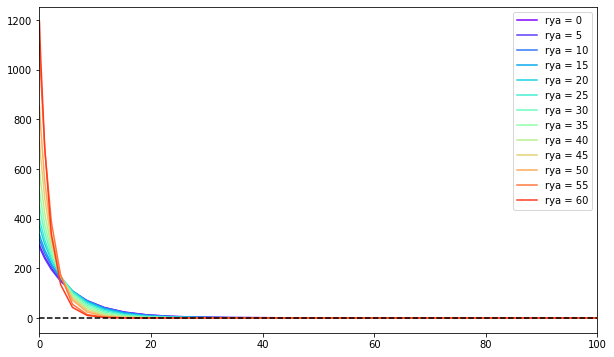

In [30]:

get_fast_temp_and_density(f_array[0], minEnergy=0.001, rya=rya, enerkev=enerkev, pitchAngleMesh=pitchAngleMesh, vnorm=vnorm)

def plot_maxwell(rhoindex, plotlog):
    denstring = '6d+19 6d+19 6d+19 5.986725056634288d+19 5.986725056634288d+19 5.986725056634288d+19 5.948518485302237d+19 5.948518485302237d+19 5.948518485302237d+19 5.887259120967139d+19 5.887259120967139d+19 5.887259120967139d+19 5.80455313706103d+19 5.80455313706103d+19 5.80455313706103d+19 5.702018824288829d+19 5.702018824288829d+19 5.702018824288829d+19 5.581357329271045d+19 5.581357329271045d+19 5.581357329271045d+19 5.444483787761028d+19 5.444483787761028d+19 5.444483787761028d+19 5.2945027091694944d+19 5.2945027091694944d+19 5.2945027091694944d+19 5.13546261090572d+19 5.13546261090572d+19 5.13546261090572d+19 4.972371000723766d+19 4.972371000723766d+19 4.972371000723766d+19 4.810849763151402d+19 4.810849763151402d+19 4.810849763151402d+19 4.6564296560072016d+19 4.6564296560072016d+19 4.6564296560072016d+19 4.514401272324039d+19 4.514401272324039d+19 4.514401272324039d+19 4.388320401667927d+19 4.388320401667927d+19 4.388320401667927d+19 4.281228931918998d+19 4.281228931918998d+19 4.281228931918998d+19 4.195155884299396d+19 4.195155884299396d+19 4.195155884299396d+19 4.133155055081277d+19 4.133155055081277d+19 4.133155055081277d+19 4.100435183688871d+19 4.100435183688871d+19 4.100435183688871d+19 4.100124665080464d+19 4.100124665080464d+19 4.100124665080464d+19 4.116454598261814d+19 4.116454598261814d+19 4.116454598261814d+19 4.118962810907007d+19 4.118962810907007d+19 4.118962810907007d+19 4.052988175976845d+19 4.052988175976845d+19 4.052988175976845d+19 3.808795850871087d+19 3.808795850871087d+19 3.808795850871087d+19 3.1393189052966003d+19 3.1393189052966003d+19 3.1393189052966003d+19 1.6795637554512267d+19 1.6795637554512267d+19 1.6795637554512267d+19'
    tempstring = '4.44281 5.92375 5.92375 4.43003 5.90671 5.90671 4.39292 5.85723 5.85723 4.3328 5.77706 5.77706 4.25065 5.66753 5.66753 4.1474 5.52987 5.52987 4.024 5.36534 5.36534 3.8814 5.17521 5.17521 3.72173 4.96231 4.96231 3.54797 4.73063 4.73063 3.36412 4.48549 4.48549 3.1749 4.2332 4.2332 2.9853 3.98039 3.98039 2.79999 3.73332 3.73332 2.62237 3.49649 3.49649 2.45457 3.27276 3.27276 2.29738 3.06318 3.06318 2.15171 2.86895 2.86895 2.01948 2.69264 2.69264 1.90409 2.53879 2.53879 1.80979 2.41305 2.41305 1.72656 2.30208 2.30208 1.62506 2.16674 2.16674 1.44556 1.92741 1.92741 1.03492 1.37989 1.37989 0.10969 0.14625 0.14625'
    denstring = denstring.replace('d+', 'e')
    denstringlist = denstring.split()
    tempstringlist = tempstring.split()
    print(denstringlist)
    dens = np.zeros((len(denstringlist), 1))
    for i in range(len(denstringlist)): 
        dens[i] = float(denstringlist[i])

    temps = np.zeros((len(tempstringlist), 1))
    for i in range(len(tempstringlist)): 
        temps[i] = float(tempstringlist[i])

    #print(temps.reshape(int(dens.shape[0]/3), 3))
    dens = dens.reshape(int(dens.shape[0]/3), 3)[:, 0]
    temps = temps.reshape(int(temps.shape[0]/3), 3)[:, 1]

    rhotemps = np.linspace(0.01, .99, temps.shape[0])
    rhodens = np.linspace(0.01, .99, dens.shape[0])

    from scipy.interpolate import interp1d
    get_dens_from_rho = interp1d(rhodens, dens, kind='cubic')
    get_temps_from_rho = interp1d(rhotemps, temps, kind='cubic')
    rho = np.ma.getdata(rya)
    #plt.plot(np.ma.getdata(rya), get_dens_from_rho(np.ma.getdata(rya)))
    M = 3.343e-27
    v_array = np.linspace(0, 50e6, 200)

    f_maxwell_cold = np.zeros((rho.shape[0], v_array.shape[0]))

    for i in range(rho.shape[0]):
        rho_i = rho[i]
        T = get_temps_from_rho(rho_i)*1e3*1.6022e-19 # J
        n = get_dens_from_rho(rho_i)
        f_maxwell_cold[i, :] = n*(M/(2*np.pi*T))**(3/2) * np.exp(-M*v_array**2/(2*T))

    # plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), 4*np.pi*v_array*f_maxwell_cold[0, :], 'r--')
    # plt.plot(v_array, 4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :], 'r--')
    if plotlog:
        plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), np.log(4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :]+1), 'r--')
    else: 
        plt.plot(0.5*M*v_array**2/(1.6022e-19*1000), 4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :], 'r--')
    print('Maxwellian total density: ', np.trapz(4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :], v_array))
    max_energy_grid = 0.5*M*v_array**2/(1.6022e-19*1000)
    return max_energy_grid, 4*np.pi*v_array**2*f_maxwell_cold[rhoindex, :]





In [31]:
dvol = cql_nc_array[0].variables['dvol'][:]
# dvol = cql_nc_0_55.variables['dvol'][:]
# dvol2 = cql_nc_0_7.variables['dvol'][:]
# print(np.array_equal(dvol, dvol2))

Text(0.5, 1.0, 'Electrons')

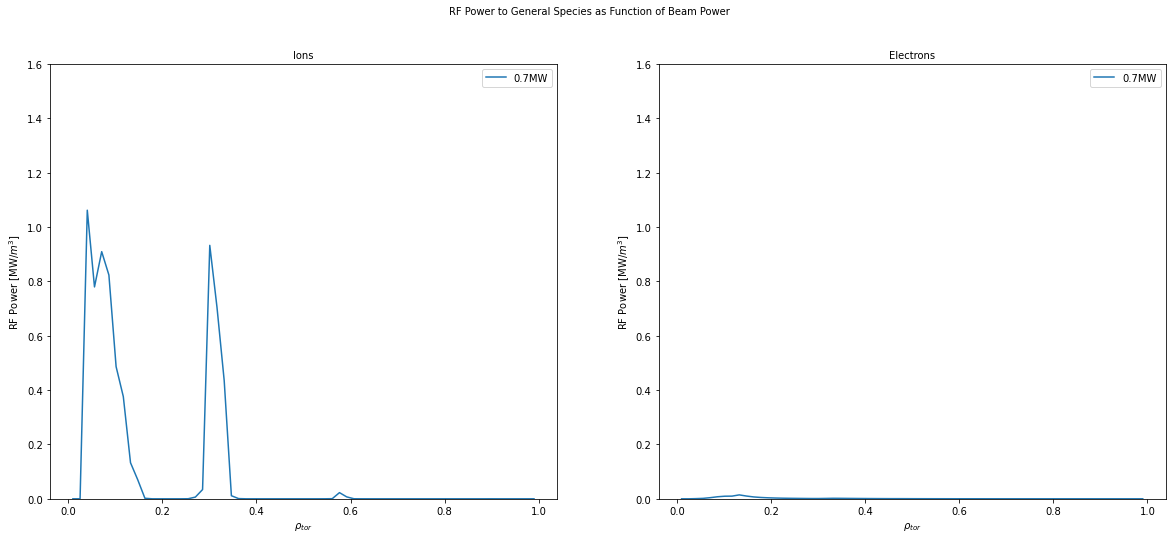

In [32]:
species_index = 0

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('RF Power to General Species as Function of Beam Power')
fig.set_size_inches(20, 8)

powers_array = np.zeros_like(scan_var_array).tolist()
for i in range(scan_var_array.shape[0]):
    powers_array[i] = cql_nc_array[i].variables['powers'][-1, species_index, :, :]

pwr_RF_to_gen = np.zeros_like(scan_var_array).tolist()
for i in range(scan_var_array.shape[0]):
    pwr_RF_to_gen[i] = powers_array[i][4, :]

# powers0_55 = cql_nc_0_55.variables['powers'][-1, species_index, :, :]
# powers0_5 = cql_nc_0_5.variables['powers'][-1, species_index, :, :]
# powers0_6 = cql_nc_0_6.variables['powers'][-1, species_index, :, :]
# powers0_65 = cql_nc_0_65.variables['powers'][-1, species_index, :, :]
# powers0_7 = cql_nc_0_7.variables['powers'][-1, species_index, :, :]

# pwr_RF_to_gen0_55 = powers0_55[4, :]
# pwr_RF_to_gen0_5 = powers0_5[4, :]
# pwr_RF_to_gen0_6 = powers0_6[4, :]
# pwr_RF_to_gen0_65 = powers0_65[4, :]
# pwr_RF_to_gen0_7 = powers0_7[4, :]

for i in range(scan_var_array.shape[0]):
    label = str(scan_var_array[i]) + 'MW'
    ax1.plot(rya, pwr_RF_to_gen[i], label=label)
ax1.set_ylim(0, 1.6)
ax1.legend()

ax1.set_xlabel(r'$\rho_{tor}$')
ax1.set_ylabel(r'RF Power [MW/$m^3$]')
ax1.set_title('Ions')

# ax1.plot(rya, pwr_RF_to_gen0_5, label='0.5 MW')
# ax1.plot(rya, pwr_RF_to_gen0_55, label='0.55 MW')
# ax1.plot(rya, pwr_RF_to_gen0_6, label='0.6 MW')
# ax1.plot(rya, pwr_RF_to_gen0_65, label='0.65 MW')
# ax1.plot(rya, pwr_RF_to_gen0_7, label='0.7 MW')


species_index = 1
powers_array = np.zeros_like(scan_var_array).tolist()
for i in range(scan_var_array.shape[0]):
    powers_array[i] = cql_nc_array[i].variables['powers'][-1, species_index, :, :]

pwr_RF_to_gen = np.zeros_like(scan_var_array).tolist()
for i in range(scan_var_array.shape[0]):
    pwr_RF_to_gen[i] = powers_array[i][4, :]

for i in range(scan_var_array.shape[0]):
    label = str(scan_var_array[i]) + 'MW'
    ax2.plot(rya, pwr_RF_to_gen[i], label=label)
ax2.set_ylim(0, 1.6)
ax2.legend()

ax2.set_xlabel(r'$\rho_{tor}$')
ax2.set_ylabel(r'RF Power [MW/$m^3$]')
ax2.set_title('Electrons')
# powers0_55 = cql_nc_0_55.variables['powers'][-1, species_index, :, :]
# powers0_5 = cql_nc_0_5.variables['powers'][-1, species_index, :, :]
# powers0_6 = cql_nc_0_6.variables['powers'][-1, species_index, :, :]
# powers0_65 = cql_nc_0_65.variables['powers'][-1, species_index, :, :]
# powers0_7 = cql_nc_0_7.variables['powers'][-1, species_index, :, :]

# pwr_RF_to_gen0_55 = powers0_55[4, :]
# pwr_RF_to_gen0_5 = powers0_5[4, :]
# pwr_RF_to_gen0_6 = powers0_6[4, :]
# pwr_RF_to_gen0_65 = powers0_65[4, :]
# pwr_RF_to_gen0_7 = powers0_7[4, :]

# ax2.plot(rya, pwr_RF_to_gen0_5, label='0.5 MW')
# ax2.plot(rya, pwr_RF_to_gen0_55, label='0.55 MW')
# ax2.plot(rya, pwr_RF_to_gen0_6, label='0.6 MW')
# ax2.plot(rya, pwr_RF_to_gen0_65, label='0.65 MW')
# ax2.plot(rya, pwr_RF_to_gen0_7, label='0.7 MW')
# ax2.set_ylim(0, 1.6)
# ax2.legend()

# ax2.set_xlabel(r'$\rho_{tor}$')
# ax2.set_ylabel(r'RF Power [MW/$m^3$]')
# ax2.set_title('Electrons')

In [97]:
# # RF power to general species 
# total_RF_power = np.zeros_like(scan_var_array)
# #rfpwr_array = np.array([0.5, 0.55, 0.6, 0.65, 0.7])
# #print(np.trapz(pwr_RF_to_gen0_55*dvol*(1/100)**3))

# for i in range(scan_var_array.shape[0]):
#     total_RF_power[i] = np.trapz(pwr_RF_to_gen_array*dvol*(1/100)**3)
    



# ax1.set_xlabel(r'$\rho_{tor}$')
# ax1.set_ylabel(r'RF Power [MW/$m^3$]')
# ax1.set_title('Ions')
# total_RF_power[0] = np.trapz(pwr_RF_to_gen0_5*dvol*(1/100)**3)
# total_RF_power[1] = np.trapz(pwr_RF_to_gen0_55*dvol*(1/100)**3)
# total_RF_power[2] = np.trapz(pwr_RF_to_gen0_6*dvol*(1/100)**3)
# total_RF_power[3] = np.trapz(pwr_RF_to_gen0_65*dvol*(1/100)**3)
# total_RF_power[4] = np.trapz(pwr_RF_to_gen0_7*dvol*(1/100)**3)

# print(total_RF_power)

# plt.ylim((0, 1.1*max(total_RF_power)))
# plt.plot(rfpwr_array, total_RF_power)
# plt.title(f'Absorbed RF power on General Species \n Maxwell Electrons Only')
# plt.xlabel('RF Power [MW]')
# plt.ylabel('Absorbed RF Power [MW]')

0.7093742681746258
[0.7]
[0.70937427]
[0.69625166]


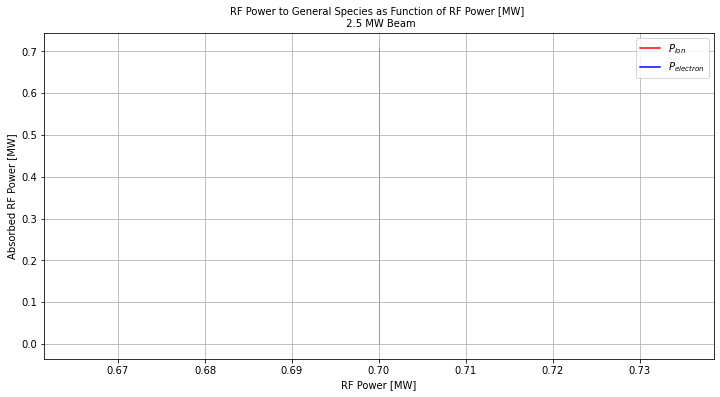

In [35]:
# Area to plot the power partition between species
total_RF_power_ion_array = np.zeros_like(scan_var_array) #np.array([0.0, 0.0, 0.0, 0.0, 0.0])
total_RF_power_e_array = np.zeros_like(scan_var_array) #np.array([0.0, 0.0, 0.0, 0.0, 0.0])
pwr_RF_to_gen_ion_array = np.zeros_like(scan_var_array).tolist()
pwr_RF_to_gen_e_array = np.zeros_like(scan_var_array).tolist()

species_index = 0
for i in range(len(pwr_RF_to_gen_ion_array)):
    pwr_RF_to_gen_ion_array[i] = cql_nc_array[i].variables['powers'][-1, species_index, :, :][4, :]

species_index = 1
for i in range(len(pwr_RF_to_gen_e_array)):
    pwr_RF_to_gen_e_array[i] = cql_nc_array[i].variables['powers'][-1, species_index, :, :][4, :]

for i in range(total_RF_power_ion_array.shape[0]):
    total_RF_power_ion_array[i] = np.trapz(pwr_RF_to_gen_ion_array[i]*dvol*(1/100)**3)

for i in range(total_RF_power_e_array.shape[0]):
    total_RF_power_e_array[i] = np.trapz(pwr_RF_to_gen_e_array[i]*dvol*(1/100)**3)

# pwr_RF_to_gen0_55_ion = cql_nc_0_55.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_5_ion = cql_nc_0_5.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_6_ion = cql_nc_0_6.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_65_ion = cql_nc_0_65.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_7_ion = cql_nc_0_7.variables['powers'][-1, species_index, :, :][4, :]

# species_index = 1
# pwr_RF_to_gen0_55_e = cql_nc_0_55.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_5_e = cql_nc_0_5.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_6_e = cql_nc_0_6.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_65_e = cql_nc_0_65.variables['powers'][-1, species_index, :, :][4, :]
# pwr_RF_to_gen0_7_e = cql_nc_0_7.variables['powers'][-1, species_index, :, :][4, :]

# total_RF_power_ion[0] = np.trapz(pwr_RF_to_gen0_5_ion*dvol*(1/100)**3)
# total_RF_power_ion[1] = np.trapz(pwr_RF_to_gen0_55_ion*dvol*(1/100)**3)
# total_RF_power_ion[2] = np.trapz(pwr_RF_to_gen0_6_ion*dvol*(1/100)**3)
# total_RF_power_ion[3] = np.trapz(pwr_RF_to_gen0_65_ion*dvol*(1/100)**3)
# total_RF_power_ion[4] = np.trapz(pwr_RF_to_gen0_7_ion*dvol*(1/100)**3)

# total_RF_power_e[0] = np.trapz(pwr_RF_to_gen0_5_e*dvol*(1/100)**3)
# total_RF_power_e[1] = np.trapz(pwr_RF_to_gen0_55_e*dvol*(1/100)**3)
# total_RF_power_e[2] = np.trapz(pwr_RF_to_gen0_6_e*dvol*(1/100)**3)
# total_RF_power_e[3] = np.trapz(pwr_RF_to_gen0_65_e*dvol*(1/100)**3)
# total_RF_power_e[4] = np.trapz(pwr_RF_to_gen0_7_e*dvol*(1/100)**3)

total_RF_power_both = total_RF_power_ion_array + total_RF_power_e_array
fig, ax1 = plt.subplots(1, 1)
plt.title(f'RF Power to General Species as Function of {scan_var_type} \n 2.5 MW Beam')
factor = 1.2
fig.set_size_inches(10*factor, 5*factor)
plt.plot(scan_var_array, total_RF_power_ion_array)
#plt.plot(rfpwr_array, total_RF_power_e)
plt.plot(scan_var_array, total_RF_power_ion_array, color='red', label=r'$P_{ion}$')
plt.plot(scan_var_array, total_RF_power_both, color='blue', label=r'$P_{electron}$')
plt.xlabel(scan_var_type)
plt.ylabel('Absorbed RF Power [MW]')
plt.legend()
#plt.ylim(0, 1)

plt.fill_between(scan_var_array, total_RF_power_both, total_RF_power_ion_array, color='blue')
plt.fill_between(scan_var_array, total_RF_power_both*0, total_RF_power_ion_array, color='red')
plt.grid()
print(total_RF_power_both[-1])
print(scan_var_array)
print(total_RF_power_both)
print(total_RF_power_ion_array)

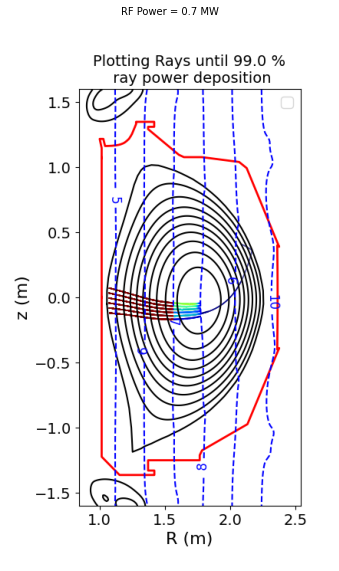

In [37]:
%matplotlib inline
plt.rc('figure', labelsize=52)
fig, (ax1) = plt.subplots(1, 1)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ax1.imshow(mpimg.imread('rays_rfpwr0_7.png'))
ax1.axis('off')

ax1.set_title('RF Power = 0.7 MW')


fig.set_size_inches(10, 10)

plt.show()

index of max density:  (array([4]),)
<function where at 0x7f5ee21981f0>


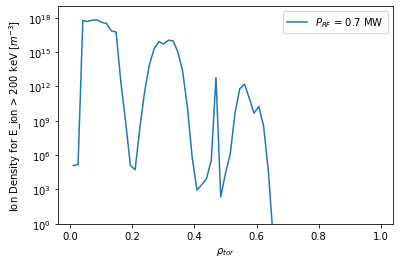

In [41]:
# plot the energetic particles over rho to easily compare between cases. 

def plot_energetic_ion_density_versus_rho(min_E, f, species_index, beam_label):
    minEnergy = 2 # minimum energy for plotting

    #index of that minimum energy in enerkev
    #this index is also the index for the corresponding velocity
    minEnergyIndex = np.where(enerkev < minEnergy)[0][-1]
    #distribution function for energetic particles (ions)
    energeticF = f[species_index, :,minEnergyIndex:,:]#f[0, :,minEnergyIndex:,:]

    # begin integrating over velocity space 
    energeticF_integOverPitch = np.zeros((len(rya), len(enerkev[minEnergyIndex:])))

    # loop over r/a. At each r/a, integrate over all pitch angle. 
    for rhoIndex in range(len(rya)):
        #this is the angular part of the spherical jacobian
        integOverPitch = 2*np.pi*np.trapz(energeticF[rhoIndex,:]*np.sin(pitchAngleMesh[rhoIndex]), pitchAngleMesh[rhoIndex], axis = 1)
        energeticF_integOverPitch[rhoIndex,:] = integOverPitch
        
    relevantEnergies = enerkev[minEnergyIndex:]
    relevantVels = normalizedVel[minEnergyIndex:]
    energeticDensity = np.zeros((len(rya), len(relevantEnergies)-1))
    #the energies at which the values of energeticDensity are centered
    energyCenters = (relevantEnergies[1:] + relevantEnergies[:-1])/2

    # Ion density versus r/a. Integrated over all energies. 

    energeticDensity_1D = np.zeros(len(rya))
    E_idx = np.argmin(np.abs(min_E - enerkev))

    #this is the radial part of the spherical jacobian
    energeticDensity_1D = np.ma.getdata(np.trapz(energeticF_integOverPitch[:,E_idx:]*relevantVels[E_idx:]**2,
        relevantVels[E_idx:]))

    energeticDensity_1D = energeticDensity_1D*1e6 # convert to m^-3
    plt.yscale('log')
    plt.ylim([1e0, 1e19])
    plt.plot(rya, energeticDensity_1D, label=beam_label)
    plt.xlabel(r'$\rho_{tor}$')
    plt.ylabel(f'Ion Density for E_ion > {min_E} keV' + r' [$m^{-3}$]')
    print('index of max density: ', np.where(energeticDensity_1D == max(energeticDensity_1D)))

for i in range(len(f_array)):
    label = r'$P_{RF}$ = ' + str(scan_var_array[i]) + ' MW'
    plot_energetic_ion_density_versus_rho(min_E=200, f=f_array[i], species_index=0, beam_label=label)
# plot_energetic_ion_density_versus_rho(min_E=200, f=f0_5, species_index=0, beam_label=r'$P_{RF}$ = 0.5 MW')
# plot_energetic_ion_density_versus_rho(min_E=200, f=f0_55, species_index=0, beam_label=r'$P_{RF}$ = 0.55 MW')
# plot_energetic_ion_density_versus_rho(min_E=200, f=f0_6, species_index=0, beam_label=r'$P_{RF}$ = 0.6 MW')
# plot_energetic_ion_density_versus_rho(min_E=200, f=f0_65, species_index=0, beam_label=r'$P_{RF}$ = 0.65 MW')
# plot_energetic_ion_density_versus_rho(min_E=200, f=f0_7, species_index=0, beam_label=r'$P_{RF}$ = 0.7 MW')

plt.legend()
print(np.where)

index of max density:  (array([2]),)


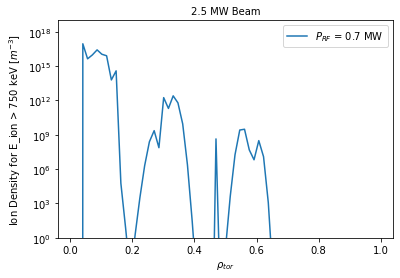

In [42]:
# plot_energetic_ion_density_versus_rho(min_E=750, f=f0_5, species_index=0, beam_label=r'$P_{RF}$ = 0.5 MW')
# plot_energetic_ion_density_versus_rho(min_E=750, f=f0_55, species_index=0, beam_label=r'$P_{RF}$ = 0.55 MW')
# plot_energetic_ion_density_versus_rho(min_E=750, f=f0_6, species_index=0, beam_label=r'$P_{RF}$ = 0.6 MW')
# plot_energetic_ion_density_versus_rho(min_E=750, f=f0_65, species_index=0, beam_label=r'$P_{RF}$ = 0.65 MW')
# plot_energetic_ion_density_versus_rho(min_E=750, f=f0_7, species_index=0, beam_label=r'$P_{RF}$ = 0.7 MW')
for i in range(len(f_array)):
    label = r'$P_{RF}$ = ' + str(scan_var_array[i]) + ' MW'
    plot_energetic_ion_density_versus_rho(min_E=750, f=f_array[i], species_index=0, beam_label=label)
plt.title('2.5 MW Beam')
plt.legend()

Text(0, 0.5, 'Absorbed Beam Power Density $MW/m^3$')

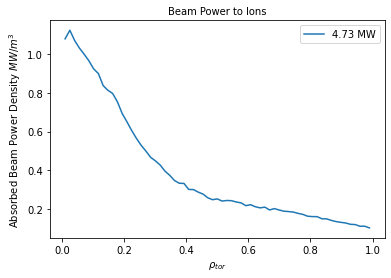

In [43]:
# NB power area 
species_index = 0
pwr_beam_to_gen_array = np.zeros_like(scan_var_array).tolist()
for i in range(len(pwr_beam_to_gen_array)):
    pwr_beam_to_gen_array[i] = cql_nc_array[i].variables['powers'][-1, species_index, :, :][5, :]
# powers0_55 = cql_nc_0_55.variables['powers'][-1, species_index, :, :]
# powers0_5 = cql_nc_0_5.variables['powers'][-1, species_index, :, :]
# powers0_6 = cql_nc_0_6.variables['powers'][-1, species_index, :, :]
# powers0_65 = cql_nc_0_65.variables['powers'][-1, species_index, :, :]
# powers0_7 = cql_nc_0_7.variables['powers'][-1, species_index, :, :]
# pwr_beam_to_gen0 = powers0_55[5, :]
# pwr_beam_to_gen2_5 = powers0_5[5, :]
# pwr_beam_to_gen5 = powers0_6[5, :]
# pwr_beam_to_gen7_5 = powers0_65[5, :]
# pwr_beam_to_gen10 = powers0_7[5, :]

for i in range(len(pwr_beam_to_gen_array)):
    beam_power = np.trapz(pwr_beam_to_gen_array[i]*dvol*(1/100)**3)
    label = str(round(beam_power, 2)) + ' MW'
    plt.plot(rya, pwr_beam_to_gen_array[i], label=label)
# plt.plot(rya, pwr_beam_to_gen0, label='0 MW')
# plt.plot(rya, pwr_beam_to_gen2_5, label='2.5 MW')
# plt.plot(rya, pwr_beam_to_gen5, label='5 MW')
# plt.plot(rya, pwr_beam_to_gen7_5, label='7.5 MW')
# plt.plot(rya, pwr_beam_to_gen10, label='10 MW')
plt.legend()
plt.title('Beam Power to Ions')
plt.xlabel(r'$\rho_{tor}$')
plt.ylabel(r'Absorbed Beam Power Density $MW/m^3$')

In [51]:
# # Beam power to general species 
# total_beam_power = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
# rfpwr_array = np.array([0.1, 0.5, 1, 1.5, 2])
# print(np.trapz(pwr_RF_to_gen0_55*dvol*(1/100)**3))

# total_beam_power[0] = np.trapz(pwr_beam_to_gen0*dvol*(1/100)**3)
# total_beam_power[1] = np.trapz(pwr_beam_to_gen2_5*dvol*(1/100)**3)
# total_beam_power[2] = np.trapz(pwr_beam_to_gen5*dvol*(1/100)**3)
# total_beam_power[3] = np.trapz(pwr_beam_to_gen7_5*dvol*(1/100)**3)
# total_beam_power[4] = np.trapz(pwr_beam_to_gen10*dvol*(1/100)**3)

# print(total_beam_power)

# plt.ylim((0, 1.1*max(total_beam_power)))
# plt.plot(rfpwr_array, total_beam_power)
# plt.title(f'Absorbed RF power on General Species (D) \n Maxwell Electrons Only')
# plt.xlabel('RF Power [MW]')
# plt.ylabel('Absorbed Beam Power [MW]')

1


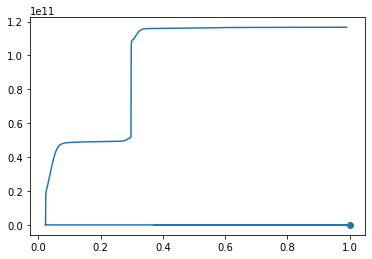

In [46]:
# delete this area. Just checking I am thinknig about these rays correctly. 
from scipy import signal
find_peaks = signal.find_peaks
radialVariable = (np.copy(cqlrf_nc_array[0].variables["spsi"]))
delpwr= np.copy(cqlrf_nc_array[0].variables["delpwr"])
bounceRho = .96 
ray = 10
peakIndices, _ = find_peaks(radialVariable[ray, :], height = bounceRho)
offset = 0
relevantIndices = peakIndices#[peakIndices > offset]

plt.plot(radialVariable[ray, :], delpwr[ray, :])
plt.scatter(radialVariable[ray, peakIndices], delpwr[ray, peakIndices])
print(len(relevantIndices))
#print(delpwr[])

In [47]:
# Calculate SPA for different beam powers 
from scipy import signal
find_peaks = signal.find_peaks
# Calculate SPA for different beam powers 
from scipy import signal
find_peaks = signal.find_peaks
def getSPA(cqlrf_nc):
    """
    Finds single pass absorbtion using 
    1) energy at reflection point if ray is reflected
    2) assume all ray energy deposited if not reflected 
    Jacob fixed bug ignoring rays that did not reflect in SPA calculation 
    """
    radialVariable = (np.copy(cqlrf_nc.variables["spsi"]))
    delpwr= np.copy(cqlrf_nc.variables["delpwr"])


    #initialize SPA to zero. 
    averageSPA = 0
    bounceRho = .96  # if the ray turns after rho = 0.96, consider it reflected
   
    #fig,ax = plt.subplots()
    offset = 1     # reject turning points at eary times 
    ticker = 0
    for i in range(len(delpwr)):
        peakIndices, _ = find_peaks(radialVariable[i], height = bounceRho)
        relevantIndices = peakIndices[peakIndices > offset]
        
        #print(len(relevantIndices))
        if len(relevantIndices) >= 1:
            bounceIndex = relevantIndices[0]
            SPA = 1-delpwr[i][bounceIndex]/delpwr[i][0]
            averageSPA += SPA
            ticker = ticker + 1 
        elif len(relevantIndices) == 0:
            SPA = 1
            averageSPA += SPA
            #wr  = cqlrf_nc.variables["wr"][:] #major radius of the ray at each point along the trace
            #wz  = cqlrf_nc.variables["wz"][:]
            #plt.plot(wr[i, :], wz[i, :])
            #print(f'ray={i}')
            #break

    #print(f'ticker: {ticker}')  
    averageSPA /= len(delpwr)
    print(f"average SPA: {averageSPA}")
    print(f'% of rays reflected: {ticker*100/len(delpwr)} %')
    return averageSPA

In [48]:
SPA_array = np.zeros_like(scan_var_array)#np.array([0.0, 0.0, 0.0, 0.0, 0.0])
for i in range(SPA_array.shape[0]):
    SPA_array[i] = getSPA(cqlrf_nc_array[i])
# SPA_array[0] = getSPA(cqlrf_nc_0_5)
# SPA_array[1] = getSPA(cqlrf_nc_0_55)
# SPA_array[2] = getSPA(cqlrf_nc_0_6)
# SPA_array[3] = getSPA(cqlrf_nc_0_65)
# SPA_array[4] = getSPA(cqlrf_nc_0_7)

average SPA: 0.9994641176058175
% of rays reflected: 100.0 %


Text(0, 0.5, 'SPA for 10 MW Beam')

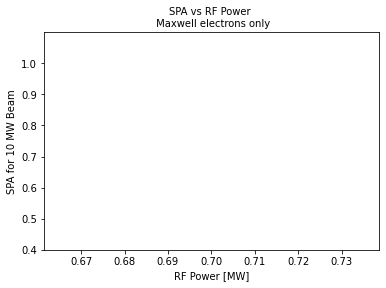

In [49]:
plt.ylim((0.4, 1.1*max(SPA_array)))
plt.plot(scan_var_array, SPA_array)
plt.title(f'SPA vs RF Power \n Maxwell electrons only')
plt.xlabel('RF Power [MW]')
plt.ylabel('SPA for 10 MW Beam')

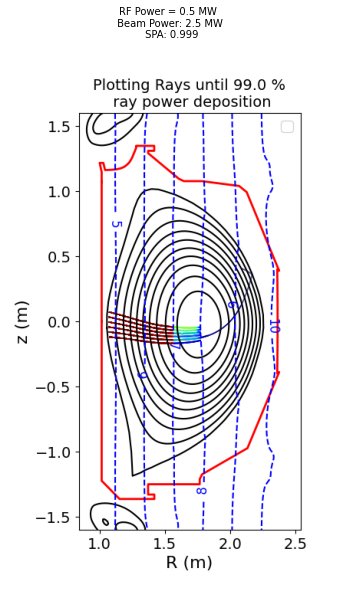

In [50]:
%matplotlib inline
import matplotlib
fig, (ax1) = plt.subplots(1, 1)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plt.rcParams.update({'font.size': 30})
ax1.imshow(mpimg.imread('rays_rfpwr0_7.png'))

ax1.axis('off')


ax1.set_title(f'RF Power = 0.5 MW \n Beam Power: 2.5 MW \n SPA: {round(SPA_array[0], 3)}')


# ax1.set_title('Beam Power = 0 MW')
# ax2.set_title('Beam Power = 2.5 MW')
# ax3.set_title('Beam Power = 5 MW')
# ax4.set_title('Beam Power = 7.5 MW')
# ax5.set_title('Beam Power = 10 MW')

fig.set_size_inches(10, 10)

plt.show()

60


(100.32518585748164, 231.1990620953556, -115.1667161679551, 106.14478977045857)

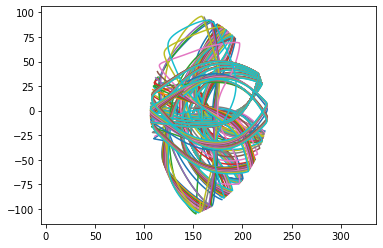

In [58]:
# Ray traces 

wr  = cqlrf_nc_array[1].variables["wr"][:] #major radius of the ray at each point along the trace
wz  = cqlrf_nc_array[1].variables["wz"][:]

wr[wr ==0] = np.nan
wz[wz==0] = np.nan
print(len(wr))
for i_ray in range(len(wr)):
    plt.plot(wr[i_ray, :], wz[i_ray, :])

plt.axis('equal')

In [59]:
# wr  = cqlrf_nc_0_55.variables["wr"][:] #major radius of the ray at each point along the trace
# wz  = cqlrf_nc_0_55.variables["wz"][:]
# radialVariable = (np.copy(cqlrf_nc_0_55.variables["spsi"]))
# delpwr= np.copy(cqlrf_nc_0_55.variables["delpwr"])

# ray_idx = 0
# plt.plot(radialVariable[ray_idx], delpwr[ray_idx])